In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.datasets import make_circles

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                  random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
#make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


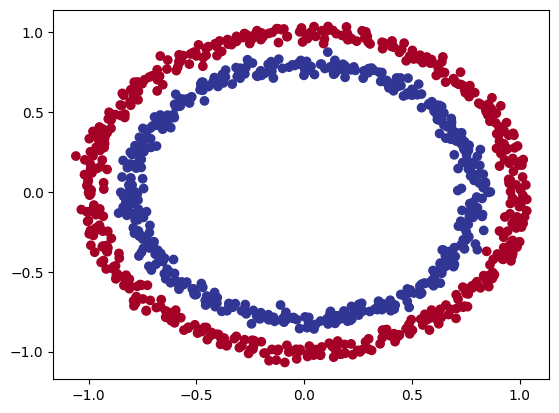

In [7]:
#to visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)

## check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
#view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


# turn data into tensors and create train and test splits 

In [10]:
import torch
torch.__version__

'2.1.2'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
#turn data into tensors --- float 32
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5],y[:5],X.dtype,y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [14]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# Building a model

## to classify blue and red dots

1. setup agnostic code so code may use GPU if available
2. Construct a model by subclassing nn.Module
3. define a loss function and optimizer
3. create training and testing loop

In [16]:
from torch import nn

#make device agnostic code -- cpu or gpu selection
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

creating a model:

1. subclass `nn.Module`
2. create `nn.Linear()` -- layers that are capable of handling the shapes of our data
3. defines a `forward()` method that outlines the forward pass of the model
4. instantiate an instance of our model class and sent it to the target `device`


In [17]:
#1. construct a model that subclass nn.Module
class CircleModelV01(nn.Module):
    def __init__(self):
        super().__init__()
        #2 create nn.Layer layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features= 2,out_features= 5) #takes in 2 features and upsclaes to 5
        self.layer_2 = nn.Linear(in_features= 5,out_features= 1) #takes in 5 features from prev layer and outputs to 1
        
    #3 define a forward() method that outlines the forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(X)) # X-> layer_1 -> layer_2 -> output
    
#4 instantiate model class and send it to target device
model_0 = CircleModelV01().to(device)
model_0

CircleModelV01(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
device

'cuda'

In [19]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
# replicate model above using nn.Sequential()
model_0 = nn.Sequential(nn.Linear(in_features= 2,out_features= 5),
                       nn.Linear(in_features= 5,out_features= 1),
                       ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0526,  0.1832],
                      [ 0.1898,  0.4928],
                      [ 0.4858,  0.5950],
                      [ 0.1696, -0.3525],
                      [-0.0526, -0.4077]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3549, -0.0472,  0.0621, -0.4339,  0.1269], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3896, -0.2126,  0.1945, -0.1602,  0.2615]], device='cuda:0')),
             ('1.bias', tensor([-0.1137], device='cuda:0'))])

In [22]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 labels:\n{y_test[:10]}")

Length of predictions 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
tensor([[0.1587],
        [0.1808],
        [0.1156],
        [0.1709],
        [0.1390],
        [0.1523],
        [0.1959],
        [0.1893],
        [0.1146],
        [0.1825]], device='cuda:0')

 First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## loss function and optimizer

### regression-- `mae` or `mse`

### classification-- `binary cross entropy` and `categorical cross entropy`

### optimizer: `SGD` and `Adam`

### loss function: `torch.nn.BCEWithLogitsLoss`

In [23]:
#setting up loss function
loss_fn = nn.BCEWithLogitsLoss() #Sigmoid layer and the BCELoss in one single class

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [24]:
#calculate accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## train model

we need to build training loop:
1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (backpropagation)
5. optimizer (gradient descent)

## going from raw logits -> prediction probabilities -> prediction labels

logits are raw output that are not passed to activation function

In [25]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.1587],
        [0.1808],
        [0.1156],
        [0.1709],
        [0.1390]], device='cuda:0')

In [26]:
torch.round(y_logits) ## which is not desired

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
#using sigmoid activation function on model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # 0 or 1 

tensor([[0.5396],
        [0.5451],
        [0.5289],
        [0.5426],
        [0.5347]], device='cuda:0')

In [29]:
## now find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full {logits -> pred probs -> pred labels}
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra-dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

## training and testing loop

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 100

#put data to darget device
X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

#training and evaluation loop
for epoch in range(epochs):
    #training
    model_0.train()
    
    #1. forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() #squeeze to remove extra 1 dimensions
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prob -> pred labels
    
    #2. cal the loss/accuracy
#     loss = loss_fn(torch.sigmoid(y_logits)) #using nn.BCELoss we need torch.sigmoid
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    #3 optimizer zero grad
    optimizer.zero_grad()
    
    #4. loss backwards (back prpagation)
    loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    ### testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass:
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calc loss and accuaracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    # printing what is happening in every 10 epochs:
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0 | Loss: 0.69577, Accuracy: 50.00% | Test loss: 0.69693, Test acc: 50.00%
Epoch: 10 | Loss: 0.69422, Accuracy: 50.00% | Test loss: 0.69543, Test acc: 50.00%
Epoch: 20 | Loss: 0.69355, Accuracy: 50.00% | Test loss: 0.69479, Test acc: 50.00%
Epoch: 30 | Loss: 0.69326, Accuracy: 55.25% | Test loss: 0.69452, Test acc: 56.00%
Epoch: 40 | Loss: 0.69313, Accuracy: 53.87% | Test loss: 0.69442, Test acc: 50.00%
Epoch: 50 | Loss: 0.69306, Accuracy: 53.75% | Test loss: 0.69440, Test acc: 46.50%
Epoch: 60 | Loss: 0.69303, Accuracy: 52.00% | Test loss: 0.69440, Test acc: 47.50%
Epoch: 70 | Loss: 0.69302, Accuracy: 51.75% | Test loss: 0.69442, Test acc: 46.00%
Epoch: 80 | Loss: 0.69301, Accuracy: 51.12% | Test loss: 0.69445, Test acc: 47.00%
Epoch: 90 | Loss: 0.69301, Accuracy: 51.25% | Test loss: 0.69447, Test acc: 47.50%


### why is the model not learning???
so lets visualize to see whats happenin'
to do so lets import a func called `plot_decision_boundary()`
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [31]:
!ls

__pycache__  state.db


In [32]:
import requests
from pathlib import Path

# Download helper function from the learn PyTorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
    print('helper_functions.py exists, skipping download')
else:
    print('Downloading helper_functions.py')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

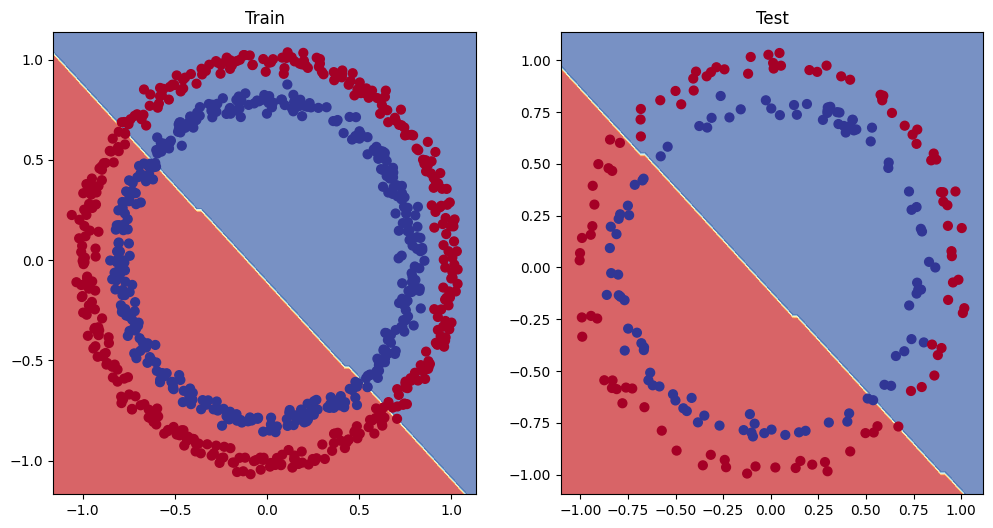

In [33]:
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #rows, column, and index of the current plot
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2) #rows, column, and index of the current plot
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

# Improving a model (from a model pov)
(altering hyperparameters)
* adding layers
* increase the number of hidden layers
* change/add activation functions
* change the optimization/loss function
* change the learning rate
* fitting for longer

*lets improve our model by:*
1. adding more hidden units: 5 ->10
2. increase the number of layers: 2 ->3
3. increase the number of epochs: 100 ->1000

In [34]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
#create loss function
loss_fn = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [36]:
#write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train longer
epochs = 1000

#put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    #training
    model_1.train()
    #1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred prob -> pred labels
    
    #2 calc los/accuracy
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    #3 optimizer zero grad
    optimizer.zero_grad()
    
    #4 loss backwards (backpropagation)
    loss.backward()
    
    # optimizer step (gradient descent)
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        #1 forward pass:
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) #logits -> pred prob -> pred labels
        
        #2 calc the loss
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%


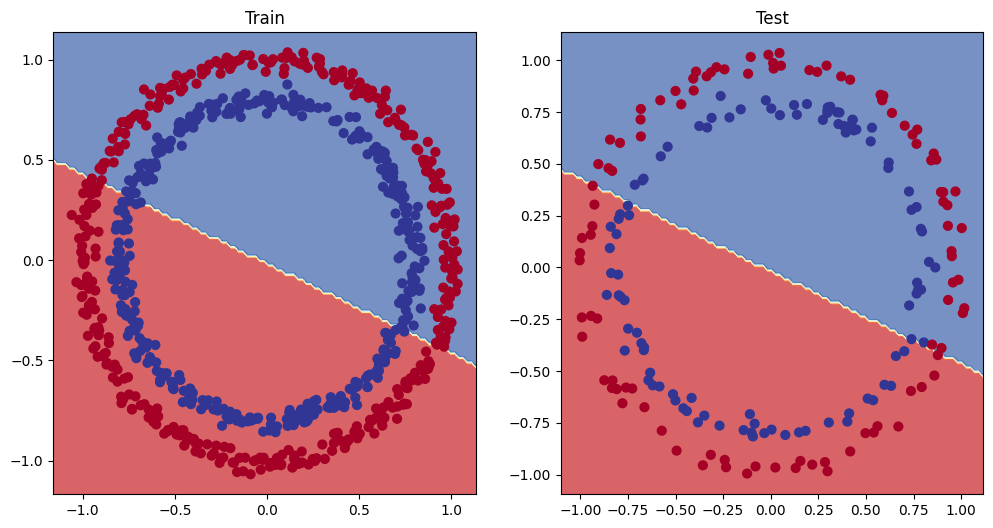

In [37]:
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #rows, column, and index of the current plot
plt.title('Train')
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2) #rows, column, and index of the current plot
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

## preparing data to see if the model can fit the straight line
---to troubleshoot by testing out in a smaller problem

In [38]:
#creating some data
weight = .7
bias = .3
start = 0 
end = 1
step = 0.01

#create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [39]:
#create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:],y_regression[train_split:]

#check the lengths 
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

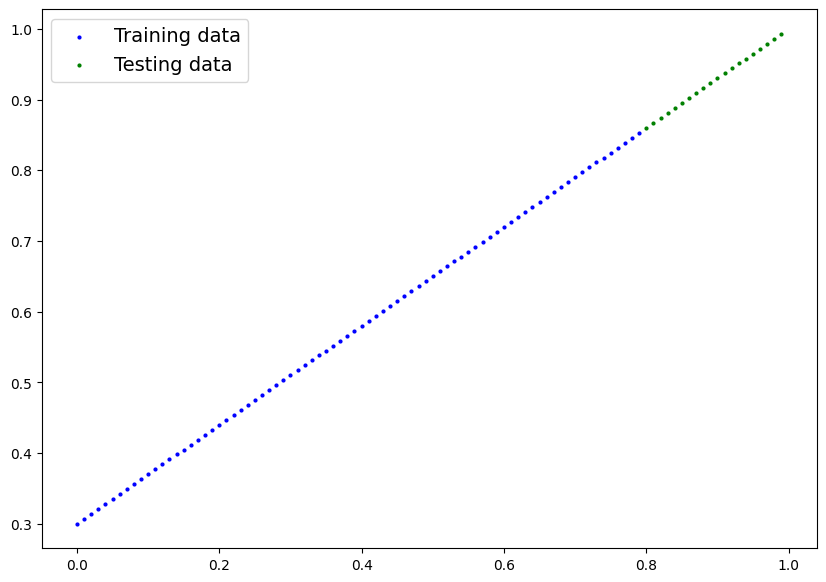

In [40]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    )

### adjusting `model_1` to fit the straight line

In [41]:
#same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
                        nn.Linear(in_features=10, out_features=10),
                        nn.Linear(in_features=10, out_features=1),
                       ).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
#loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [43]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred,y_test_regression)
    
    #print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


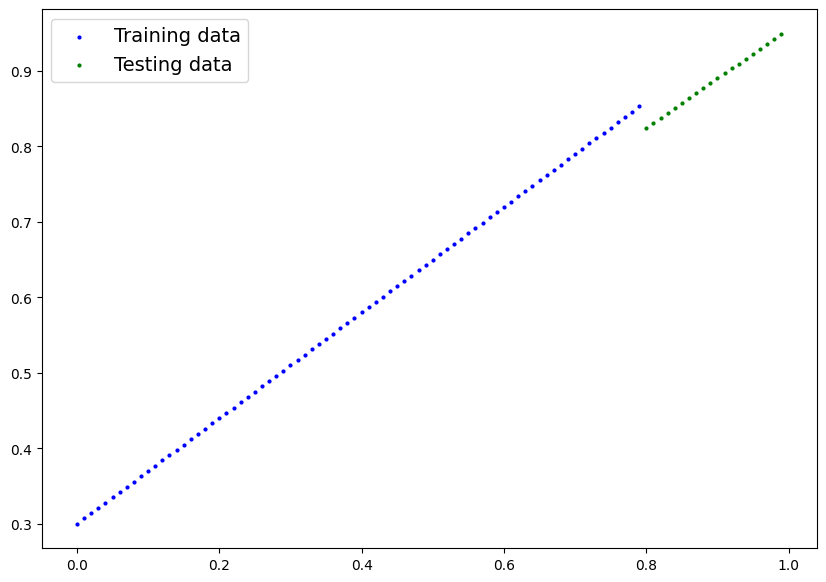

In [44]:
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
#plotting the data and predictions: .cpu() if used in cuda
plot_predictions(train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_preds.cpu())

## non-Linearity??

## recreating non-linear data (red and blue circles)

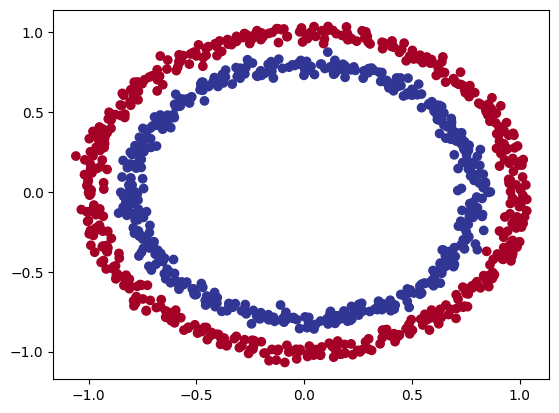

In [45]:
#make and plot data

n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [46]:
#convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [47]:
#Building a model with non linearity activation method

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=20)
        self.layer_2 = nn.Linear(in_features=20,out_features=20)
        self.layer_3 = nn.Linear(in_features=20,out_features=1)
        self.relu = nn.ReLU() #relu = non linear activation function
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
# loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                           lr=0.1)

# training model with non linearity

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_test, y_test = X_test.to(device),y_test.to(device)
X_train, y_train = X_train.to(device),y_train.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()
    
    #1. frwd pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction prob -> pred labels
    
    #2.calc loss
    loss = loss_fn(y_logits,y_train) #BCEWithLogitsLoss takes in logits as first input
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    #3 optimizer zero grad
    optimizer.zero_grad()
    
    #4.loss backwards
    loss.backward()
    
    #5. step the optimizer
    optimizer.step()
    
    ##testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    
    #print what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69448, Accuracy: 47.62% | Test Loss: 0.69197, Test Accuracy: 54.00%
Epoch: 100 | Loss: 0.69102, Accuracy: 53.12% | Test Loss: 0.68961, Test Accuracy: 56.50%
Epoch: 200 | Loss: 0.68750, Accuracy: 56.88% | Test Loss: 0.68704, Test Accuracy: 57.00%
Epoch: 300 | Loss: 0.68379, Accuracy: 59.62% | Test Loss: 0.68357, Test Accuracy: 59.50%
Epoch: 400 | Loss: 0.67821, Accuracy: 63.12% | Test Loss: 0.67807, Test Accuracy: 63.00%
Epoch: 500 | Loss: 0.66898, Accuracy: 69.50% | Test Loss: 0.66913, Test Accuracy: 72.00%
Epoch: 600 | Loss: 0.65292, Accuracy: 75.38% | Test Loss: 0.65433, Test Accuracy: 77.00%
Epoch: 700 | Loss: 0.62314, Accuracy: 85.62% | Test Loss: 0.62753, Test Accuracy: 84.00%
Epoch: 800 | Loss: 0.56539, Accuracy: 94.62% | Test Loss: 0.57623, Test Accuracy: 94.00%
Epoch: 900 | Loss: 0.45988, Accuracy: 99.38% | Test Loss: 0.48168, Test Accuracy: 98.00%


## evaluating model with non linear activation functions

In [50]:
#making predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

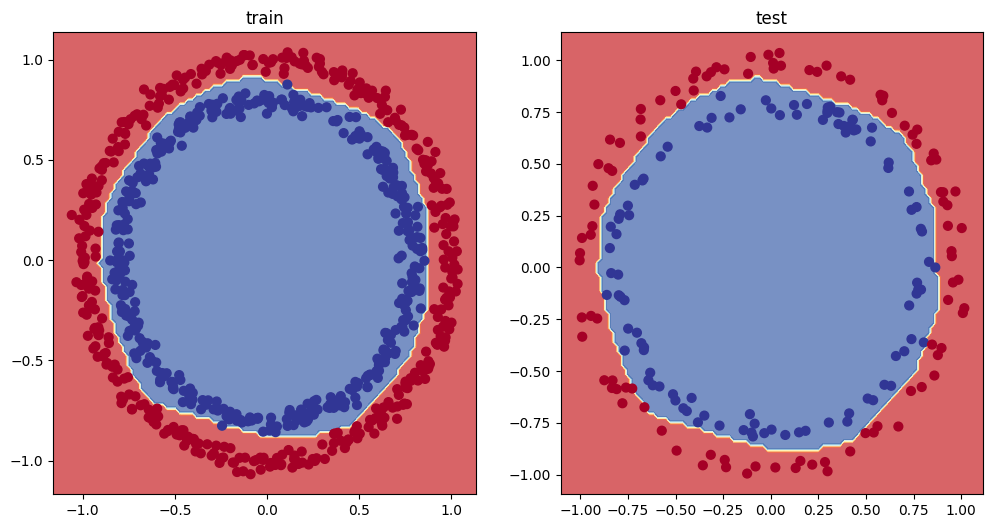

In [51]:
#plot dicision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## replicating non linear activation functions

In [52]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A,A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

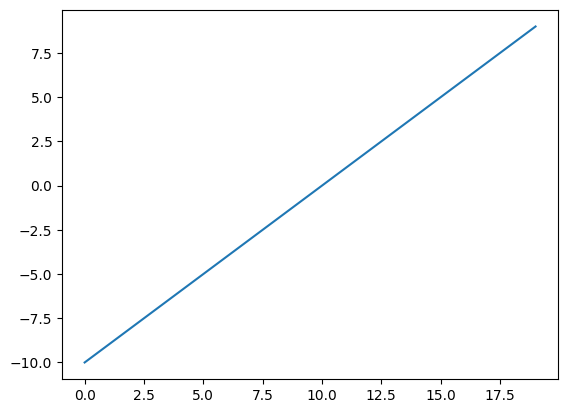

In [53]:
# Visualize the toy tensor
plt.plot(A);

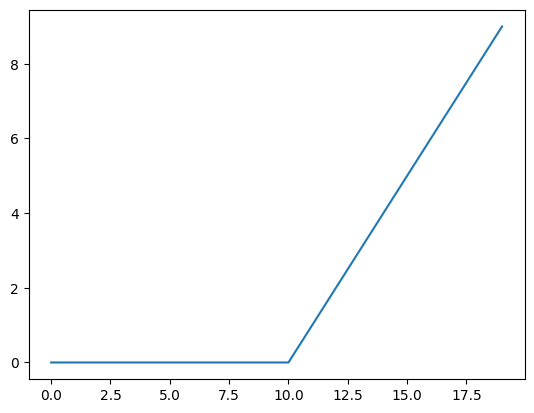

In [54]:
plt.plot(torch.relu(A))

In [55]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

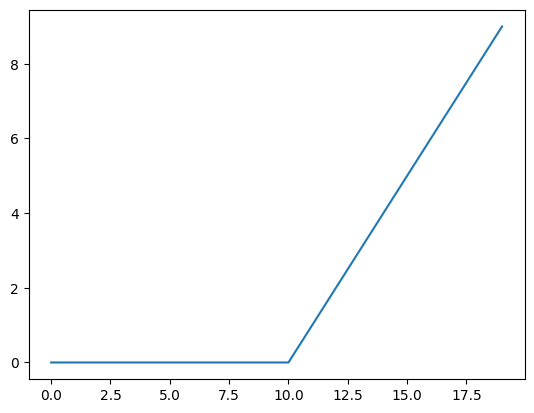

In [56]:
#plot ReLU activation function
plt.plot(relu(A))

In [57]:
#doing the same for sigmoid function:

def sigmoid(x):
    return 1/(1 + torch.exp(-x))

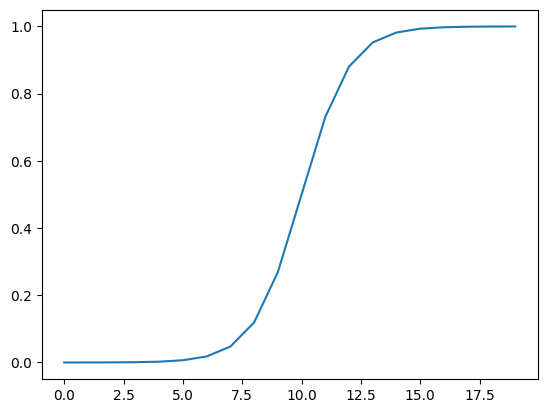

In [58]:
plt.plot(sigmoid(A))

### putting it all together with a multi-class classificaiton problem


### creating a toy multiclass dataset

tensor([[-10.1085,   5.0513],
        [ -5.6594,  -8.7264],
        [ -3.2134,   9.8281],
        [ -4.7754,  -8.9829],
        [ -8.3016,   8.1647]]) tensor([3, 2, 0, 2, 3])


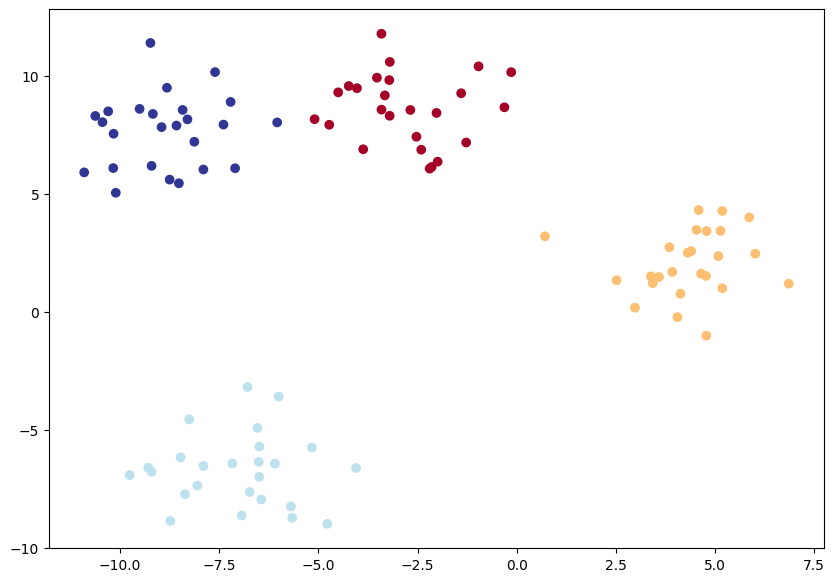

In [95]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi class data
X_blob , y_blob = make_blobs(n_samples=100,
                             n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                             random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### building a multiclass classificaiton model in pytorch

In [96]:
# create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [117]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? 
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [118]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([80, 2]), torch.Size([80]))

In [119]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3], device='cuda:0')

### loss and optimizer `multi-class classification` model

In [120]:
#loss function 
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
    lr=0.1)

## getting prediction probabilities for a multiclass pytorch model

logits (raw output of the model) -> pred probs (use `torch.softmax`) -> pred labels (take the arg max of the prediction probabilites) 

In [121]:
# getting some raw outputs of the model (logits)

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
    
y_logits[:5],print('\n'),y_blob_test[:5]

(tensor([[-0.1588, -1.0697, -0.7617, -0.2003],
         [ 0.2513, -0.2389,  0.1840, -0.0036],
         [-0.4513, -0.5389, -0.9856, -0.7075],
         [ 0.2314, -0.2672,  0.1304,  0.0178],
         [-0.1908, -1.1279, -0.8659, -0.2513]], device='cuda:0'),
 None,
 tensor([3, 2, 1, 2, 0], device='cuda:0'))

### convert model's logit outputs to prediction probabilities

In [122]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1588, -1.0697, -0.7617, -0.2003],
        [ 0.2513, -0.2389,  0.1840, -0.0036],
        [-0.4513, -0.5389, -0.9856, -0.7075],
        [ 0.2314, -0.2672,  0.1304,  0.0178],
        [-0.1908, -1.1279, -0.8659, -0.2513]], device='cuda:0')
tensor([[0.3438, 0.1383, 0.1881, 0.3298],
        [0.3010, 0.1843, 0.2814, 0.2333],
        [0.3052, 0.2796, 0.1789, 0.2362],
        [0.3013, 0.1830, 0.2724, 0.2433],
        [0.3519, 0.1378, 0.1791, 0.3312]], device='cuda:0')


In [123]:
#convert our model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       device='cuda:0')

In [124]:
y_blob_test

tensor([3, 2, 1, 2, 0, 1, 3, 1, 0, 3, 3, 2, 0, 3, 1, 3, 2, 3, 2, 1],
       device='cuda:0')

## creating a training and testing loop for a multi class model

In [125]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.16009, Acc: 38.75% | Test Loss: 1.09742, Test Acc: 40.00%
Epoch: 10 | Loss: 0.66738, Acc: 92.50% | Test Loss: 0.65098, Test Acc: 95.00%
Epoch: 20 | Loss: 0.44979, Acc: 100.00% | Test Loss: 0.42415, Test Acc: 100.00%
Epoch: 30 | Loss: 0.22921, Acc: 100.00% | Test Loss: 0.19834, Test Acc: 100.00%
Epoch: 40 | Loss: 0.09618, Acc: 100.00% | Test Loss: 0.08039, Test Acc: 100.00%
Epoch: 50 | Loss: 0.05978, Acc: 100.00% | Test Loss: 0.04968, Test Acc: 100.00%
Epoch: 60 | Loss: 0.04487, Acc: 100.00% | Test Loss: 0.03761, Test Acc: 100.00%
Epoch: 70 | Loss: 0.03665, Acc: 100.00% | Test Loss: 0.03137, Test Acc: 100.00%
Epoch: 80 | Loss: 0.03130, Acc: 100.00% | Test Loss: 0.02754, Test Acc: 100.00%
Epoch: 90 | Loss: 0.02754, Acc: 100.00% | Test Loss: 0.02487, Test Acc: 100.00%


## evaluating predictions with a multiclass model

In [126]:
# make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_logits[:10]

tensor([[ 7.4035e-04, -5.6991e+00, -4.8658e+00,  7.9891e-01],
        [-3.3058e+00, -3.8509e+00,  3.0422e+00, -2.4854e+00],
        [-1.2648e+00,  4.9120e+00, -4.3296e+00, -5.5756e+00],
        [-4.1744e+00, -4.7856e+00,  3.5699e+00, -3.0544e+00],
        [ 3.1680e+00, -3.5934e+00, -6.3796e+00, -3.4438e+00],
        [-1.2034e+00,  4.3074e+00, -3.3584e+00, -4.5772e+00],
        [-2.8389e+00, -7.6898e+00, -4.2717e+00,  3.8577e+00],
        [-1.5699e+00,  6.1581e+00, -5.5735e+00, -6.8311e+00],
        [ 3.1799e+00, -4.5035e+00, -6.6443e+00, -3.0874e+00],
        [-3.8886e+00, -7.1737e+00, -1.6467e+00,  3.1663e+00]], device='cuda:0')

In [127]:
# go from logits -> pred prob -> pred labels
y_blob_probs = torch.softmax(y_logits, dim = 1)
y_blob_probs[:10]

tensor([[3.0936e-01, 1.0353e-03, 2.3819e-03, 6.8723e-01],
        [1.7385e-03, 1.0080e-03, 9.9330e-01, 3.9491e-03],
        [2.0724e-03, 9.9780e-01, 9.6709e-05, 2.7819e-05],
        [4.3236e-04, 2.3464e-04, 9.9801e-01, 1.3252e-03],
        [9.9743e-01, 1.1547e-03, 7.1193e-05, 1.3410e-03],
        [4.0240e-03, 9.9537e-01, 4.6640e-04, 1.3787e-04],
        [1.2332e-03, 9.6458e-06, 2.9429e-04, 9.9846e-01],
        [4.4010e-04, 9.9955e-01, 8.0316e-06, 2.2838e-06],
        [9.9759e-01, 4.5929e-04, 5.3996e-05, 1.8927e-03],
        [8.5551e-04, 3.2026e-05, 8.0507e-03, 9.9106e-01]], device='cuda:0')

In [128]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_blob_probs,dim=1)
y_preds[:10]

tensor([3, 2, 1, 2, 0, 1, 3, 1, 0, 3], device='cuda:0')

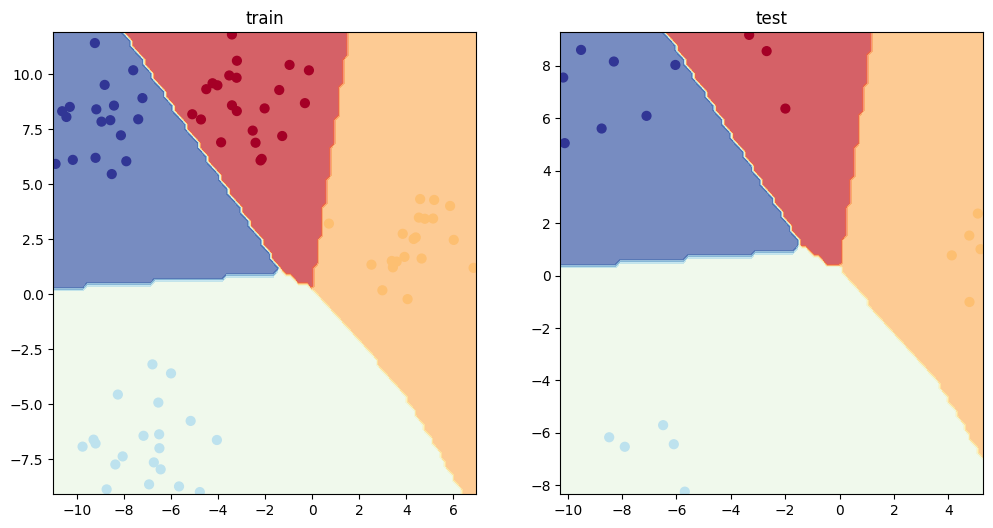

In [129]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## more classification metrics ( to evaluate classification model )

1. accuracy
2. precision
3. recall
4. F1-Score
5. Confusion-Metrix
6. Classification report

In [131]:
import torchmetrics

In [133]:
from torchmetrics import Accuracy

# setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# calc accuracy
torchmetrics_accuracy(y_preds,y_blob_test)

tensor(1., device='cuda:0')